<a href="https://colab.research.google.com/github/sriram403/MachineLearningBlogs/blob/main/TransferLearningExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classify TonyStark Vs ElonMusk

##Selecting the model

In [ ]:
MobileNet_Url = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/classification/5"

##Getting the data


In [ ]:
import os 
for filepath,class_name,image in os.walk("/content/drive/MyDrive/Datasets/elonvsstark"):
  print(f"{filepath} there are {len(class_name)} classes and {len(image)}")

/content/drive/MyDrive/Datasets/elonvsstark there are 2 classes and 0
/content/drive/MyDrive/Datasets/elonvsstark/elon there are 0 classes and 10
/content/drive/MyDrive/Datasets/elonvsstark/stark there are 0 classes and 10


In [ ]:
train_dir = "/content/drive/MyDrive/Datasets/elonvsstark/"
class_names = ["elon","stark"]

##Creating Training Set

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
im = ImageDataGenerator(rescale=1/255)
train_data = im.flow_from_directory(train_dir,batch_size=(32),target_size=(224,224),class_mode="categorical")

Found 20 images belonging to 2 classes.


##Creating a model

In [ ]:
len(class_names)

2

In [ ]:
import tensorflow_hub as hub
mobilenet_layer = hub.KerasLayer(MobileNet_Url,trainable=False)

In [ ]:
model = tf.keras.Sequential([mobilenet_layer,
                             tf.keras.layers.Dense(2,activation="softmax")])
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics="accuracy")
model_history = model.fit(train_data,epochs=5,steps_per_epoch=len(train_data))

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.8408 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 131ms/step - loss: 0.6407 - accuracy: 0.5500
Epoch 3/5
1/1 [==============================] - 0s 130ms/step - loss: 0.4863 - accuracy: 0.8000
Epoch 4/5
1/1 [==============================] - 0s 141ms/step - loss: 0.3632 - accuracy: 0.8500
Epoch 5/5
1/1 [==============================] - 0s 129ms/step - loss: 0.2729 - accuracy: 0.9500


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              5508713   
                                                                 
 dense_4 (Dense)             (None, 2)                 2004      
                                                                 
Total params: 5,510,717
Trainable params: 2,004
Non-trainable params: 5,508,713
_________________________________________________________________


##Predicting image

(-0.5, 299.5, 167.5, -0.5)

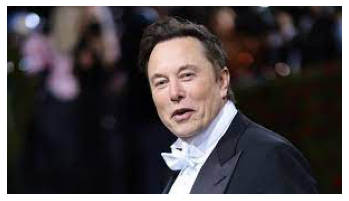

In [ ]:
elon = "/content/download.jfif"
import matplotlib.pyplot as plt
import matplotlib.image as mpim

image_read = mpim.imread(elon)
plt.imshow(image_read)
plt.axis(False)

In [ ]:
# Writing a function to import and image and resize it to be used with model predict
def load_and_prep_image(filename , img_shape = 224):
  # Read in the target image 
  img = tf.io.read_file(filename)

  # Decoding into a tensor 
  img = tf.image.decode_image(img , channels = 3)

  # Resize the image(same size as the model trained on)
  img = tf.image.resize(img , size = [img_shape , img_shape])

  # Rescale the image 
  img = img / 255.

  return img

In [ ]:
img = load_and_prep_image(elon)

In [ ]:
model_pred = model.predict(tf.expand_dims(img,axis=0))
model_pred

array([[0.8033727 , 0.19662732]], dtype=float32)

In [ ]:
class_names

['elon', 'stark']

In [ ]:
def load_and_prep_image(url,image_size=224):
  img_file = tf.io.read_file(url)
  img_data = tf.image.decode_image(img_file,channels=3)
  img_resize = tf.image.resize(img_data,size=[image_size,image_size])
  img = img_resize/255
  return img

In [ ]:
def predict(url,model,classes):
  img = load_and_prep_image(url)
  pred = model.predict(tf.expand_dims(img,axis=0))
  # print(pred)
  index = tf.argmax(pred[0],axis=0)
  class_name = class_names[index]
  # print(img)
  pred_prob = tf.reduce_max(pred[0],axis=0)
  plt.imshow(img)
  plt.title(f"prediction :{class_name} {pred_prob*100:.2f}%")
  plt.axis(False)

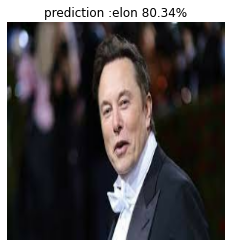

In [ ]:
predict(elon,model,class_names)

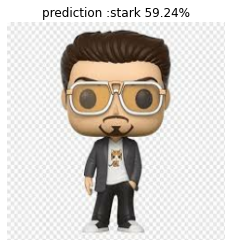

In [ ]:
stark = "/content/stark.jfif"
predict(stark,model,class_names)

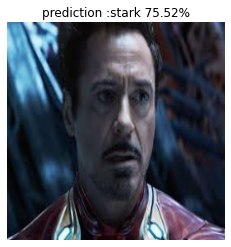

In [ ]:
stark = "/content/images (1).jfif"
predict(stark,model,class_names)

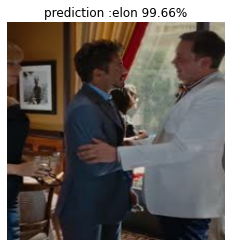

In [ ]:
stark = "/content/images.jfif"
predict(stark,model,class_names)